Confidence Intervals
====


### Estimating the proportion $p$ of data of a certain type in a sequence of data.
 
 In reality, even if there are many categories, this senario is the same as observing $n$ random variables $X_1, X_2, .., X_n$ which are IID $Bernoulli(p)$ where $p=\text{proportion of your type of interest}$. We want a confidence interval for $p$.

Let $X=\text{# of type i (i fixed)}$. So $X \sim Binomial(n, p)$.

By Central Limit Theorem, $X\approx \mathcal{N}(np, np(1-p))$. It's a bit more correct to say that $Z = \displaystyle \frac{X - np}{\sqrt{np(1-p)}} ~\sim \mathcal{N}(0,1)$

Now, we know a "good" estimator $\hat{p}_n = \displaystyle \frac{X}{n}$

A confidence interal for $\hat{p}_n$ would look like this:

$$0.95 = \mathbf{P}\left[|\hat{p}_n - p| \le \epsilon\right]$$

This means we are $\%95$ sure that $p$ is in the interval $[\hat{p}_n - \epsilon, \hat{p}_n + \epsilon ]$

Now, for a fixed confidence level $\gamma$ (here, $\gamma=0.95$) and a fixed level of accuracy $\epsilon$ (e.g. $\epsilon=0.01$)

Now, relate $Z$ to $\hat{p}_n - p$:

$$\hat{p}_n - p = \frac{X}{n} - p = \frac{1}{n}\left(X - np\right) = \frac{X - np}{\sqrt{n}}\frac{\sqrt{p(1-p)}}{\sqrt{p(1-p)}} = \frac{Z }{\sqrt{n}} \sqrt{p(1-p)}$$

Therefore, 

$$\mathbf{P}[|\hat{p}_n - p| \le \epsilon] = \mathbf{P}[|\frac{Z}{\sqrt{n}}\sqrt{p(1-p)}| \le \epsilon]  = \mathbf{P}[|Z| \le \frac{\epsilon \sqrt{n}}{\sqrt{p(1-p)}}] \\ \approx \mathbf{P}[|\mathcal{N}(0,1)| \le \frac{\epsilon \sqrt{n}}{\sqrt{p(1-p)}}] = \Phi\left(\frac{\epsilon \sqrt{n}}{\sqrt{p(1-p)}}\right) - \Phi\left(-\frac{\epsilon \sqrt{n}}{\sqrt{p(1-p)}}\right) \\ = 2\Phi\left(\frac{\epsilon \sqrt{n}}{\sqrt{p(1-p)}}\right) - 1$$

$$\gamma = 2\Phi\left(\frac{\epsilon \sqrt{n}}{\sqrt{p(1-p)}}\right) - 1 = 2\Phi(x) - 1 \text{ where } x = \frac{\epsilon \sqrt{n}}{\sqrt{p(1-p)}}$$

There are now 2 possibilities:

 1. Design an experiment so we are allowed to choose $n$; so solve above for $n$
 $$\Phi\left(x\right) = \frac{\gamma + 1}{2}$$
 thus $x = \text{the }\frac{\gamma + 1}2 \text{th}$ percentile of the standard normal

For example, with $\gamma = 0.95$, $\displaystyle x = Z_{\frac{\gamma + 1}{2}} = 1.96$

Therefore, solving for $n$, we get $\displaystyle n = \frac{p(1-p)}{\epsilon^2} \left(Z_{\frac{\gamma + 1}{2}}\right)^2$

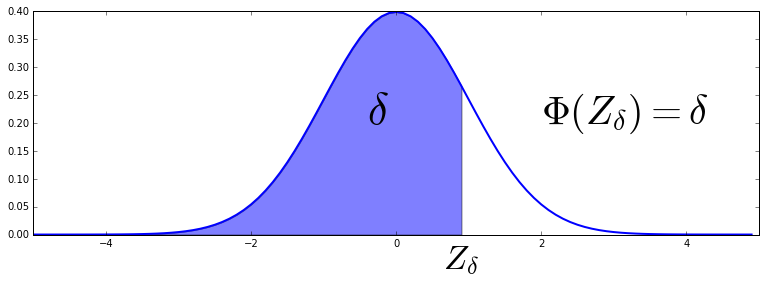

In [41]:
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

x = np.arange(-5,5,0.1)
pdf = scipy.stats.norm.pdf(x)
inx = int(3/5*x.shape[0])
plt.figure(figsize=(13,4))
plt.fill_between(x[:inx], pdf[:inx], alpha=0.5)
plt.plot(x, pdf, lw=2)
plt.text(0.65, -0.06, '$Z_\delta$', size=34)
plt.text(-0.4, 0.2, '$\delta$', size=44)
plt.text(2, 0.2, '$\Phi(Z_\delta) = \delta$', size=40)
plt.xlim(-5, 5)
plt.show()

Note: $\Phi(Z_\delta) = \delta$

2) Let's say we cannot design an experiment and choose $n$ because our data is what it is. Then, if we insist on a confidence level $\gamma$, this means we solve for $\epsilon$ instead. in other words, we get the following confidence interval.

Therefore, $\epsilon = Z_{\frac{\gamma  +1}{2}} \frac{\sqrt{p(1-p)}}{\sqrt{n}}$

**Confidence Interval:** $\displaystyle \left[ \hat{p}_n - \epsilon , \hat{p}_n + \epsilon \right]$

Minor issue: we see in both cases that the answers depend on $p$ but we do not know $p$.

Maybe a good idea is replace $p$ by $\hat{p}_n$,

But in the case of estimating a proportion, its much more conservative to notice that:

 * The term $\sqrt{p(1-p)}$ cannot be larger than $\displaystyle \frac{1}{2}$  
 
replace the previous $\epsilon$ by $\epsilon_{robust} = Z_{\frac{\gamma + 1}{2}}\times \frac{1}{2}\times \frac{1}{\sqrt{n}}$



Another minor issue: sampling without replacement

Therefore, $X$ is not actually Binomial, but it is Hypergeometric.

Let $N = \text{total # in population}$. It turns out that there is a CLT for the hypergeometric and we only need to adjust the standard deviation: in all formulas (fpr $n$, $\epsilon$, etc) just replace $p(1-p)$ by $$p(1-p) \frac{N - n}{N - 1}$$

The factor $\displaystyle \frac{N - n}{N - 1}$ is called ***finite correction factor.*** What it means is that if $N$ is too large, sampling without replacement doesnt change and is the same as sampling with replacement.

**Remark:**  when we redo the math is solving for $n$ in method 1, (design of experiment), it turns out 
$$n_{corrected} = \frac{n_{old}}{\displaystyle 1 + \frac{n_{old}}{N}}$$

### Estimating a mean $\mu$ for data 

$X_1, X_2, .., X_n$, IID

$\hat{\mu}_n = \displaystyle \frac{X_1 + X_2 + ... + X_n}{n} = \bar{X}_n \text{ sample mean }$

We use the exact same CLT-based arguments as before for finding Confidecne intervals for $\mu$ using $\hat{\mu}_n$

we only need to replace $p(1-p)$ by sample variance, ot if we are lucky, $\sigma^2 = \mathbf{Var}(X_i)$

For method #2, ($n$ fixed, not chosen): confidecne interval for $\mu$ is $\displaystyle \left[ \hat{\mu}_n - Z_{\frac{\gamma + 1}{2}} \times \frac{\sigma^2}{\sqrt{n}} , \hat{\mu}_n + Z_{\frac{\gamma + 1}{2}} \times \frac{\sigma^2}{\sqrt{n}} \right]$

Use sample variance $\hat{\sigma}^2$ or $S_n$ if $\sigma^2$ is nit known. **Recommendation:** try to use other data to find $\hat{\sigma}^2$, not the same data as in $\hat{\mu}_n$

 * For method #1, choose $n =\displaystyle \left(\frac{Z_\frac{\gamma + 1}{2}}{\epsilon}\right)^2 \sigma^2$
 
 * Finally, sample without replacement, use correction factor $\frac{N - n}{N - 1}$ next to $\sigma^2$ 

## Fisher Information and Cramer Rao Low Bound/Inequality

 (Asymptotic normality of MLE)
 
 

**Recall:** the score fiunctions of a distribution density $f(x;\theta)$:

$$l(x; \theta) = \frac{d}{d\theta} \left(\log f(x;\theta)\right) = \frac{\frac{d}{d\theta} f(x;\theta)}{f(x;\theta)} \text{ rate of change of likelihood function w.r.t. }\theta$$

Notice: $\mathbf{E}[l(X; \theta)]$:

$$\mathbf{E}[l(X; \theta)] = \mathbf{E}\left[\frac{d}{d\theta} \left(\log f(X;\theta)\right)\right] \\ = \int f(x;\theta) \frac{d}{d\theta} \left(\log f(x; \theta)\right) dx \\ = \int f(x;\theta) \frac{\frac{d}{d\theta} f(x;\theta)}{f(x;\theta)} dx \\ = \int \frac{d}{d\theta} f(x;\theta) dx  \\= \frac{d}{d\theta}  \int f(x;\theta) dx \\ \text{the order of integral and derivative are switched} \\ = \frac{d}{d\theta} 1 = 0$$

 * On average, the score function is zero.

Then, consider $\frac{\partial }{\partial \theta} l(x;\theta)$:

$$\frac{\partial }{\partial \theta} l(x;\theta) = \frac{\partial }{\partial \theta} \left(\frac{\frac{\partial ~f}{\partial \theta}}{f}\right) \\ = \frac{\partial }{\partial \theta}\left(\frac{\partial ~f}{\partial \theta}\right)\frac{1}{f} ~+~ \frac{\partial ~f}{\partial \theta}\frac{\partial }{\partial \theta}\left(\frac{1}{f}\right) \\ = \frac{\partial^2 ~f}{\partial \theta^2} \frac{1}{f} ~+~ \frac{\partial ~f}{\partial \theta} \frac{\partial f}{\partial \theta}\left(-\frac{1}{f^2}\right) \\ = \frac{\displaystyle \frac{\partial^2 }{\partial \theta^2}f(x;\theta)}{f(x;\theta)} - l^2(x;\theta)$$

Expectation

$$\mathbf{E}\left[\frac{\partial }{\partial \theta} l(x;\theta)\right] = \mathbf{E}[] - \mathbf{E}[l^2(x;\theta)]$$

 Note: since $\mathbf{E}[l(x;\theta)] = 0$, so the seconf term above is variance: $\mathbf{Var}[l(x;\theta)] = \mathbf{E}[l^2(x;\theta)]$

 Note: $\displaystyle \mathbf{E}\left[\frac{\frac{\partial^2 }{\partial \theta^2} f(x;\theta)}{f(x;\theta)}\right] = 0$ similar to $\mathbf{E}[l)x;\theta)] = 0$
 
 **Conclusion:** 
 
  * $\mathbf{E}[l(x;\theta)] = 0$   
  
  * $\mathbf{E}[\frac{\partial }{\partial \theta} l(x;\theta)] = -\mathbf{Var}[l(x;\theta)] = -\mathbf{E}[l^2(x;\theta)]$
  
  The last expression $\mathbf{E}[l^2(x;\theta)]$ is called the ***Fisher Information $\mathbf{I(\theta)}$***

$$\mathbf{I}(\theta) = \mathbf{Var}[l(x;\theta)] = \mathbf{E}[l^2(x;\theta)]$$

Why is this Fisher informaiton important?  Because of the following theorem

**Theorem:** Let $g(\theta) = \mathbf{E}[\hat{\theta}(X)]$ where $\hat{\theta}$ is any estimator of $\theta$, then

$$\mathbf{Var}[\hat{\theta}(X)] \ge \frac{g'(\theta)^2}{\mathbf{I}(\theta)}$$

Equality holds if $\hat{\theta}(X)$ is linear in $l(x;\theta)$ as a function of $X$.

Therefore, this is a universal lowe limit on how well estimators can do.

The Cramer-Rao Lower Bound (C-LRB) does not depend on which estimator we are using.

 * Note: the higher the Fisher information $\mathbf{I}(\theta)$, the bettwr because othe lower the C-LRB will be.
 
 **Remark:** when $\hat{\theta}$ is unbiased, that means $\mathbf{E}[\hat{\theta}] = \theta = g(\theta)$. Therefore, $g'(\theta) = 1$, and $\text{C-LRB}=\displaystyle \frac{1}{\mathbf{I}(\theta)}$
 
 **Remark:** Let $\mathbf{I}(\theta)$ be Fisher information for a single observation $X$. Let $\mathbf{I}_n(\theta)$ be Fisher information for vector $X_1, X_2, ..., X_n$ iid. Then, $$\mathbf{I}_n(\theta) = n\mathbf{I}(\theta)$$

### Asymptotic Normality

Recall that the MLE is a maximum for density (or PMF) $f(x;\theta)$ where $x=\text{data, fixed}$ and $\theta$ is the variable w.r.t. which we maximize.

In particular, if MLE $\hat{\theta}$ exists, it is attained at extremal values of $f(x;\theta)$ and then, usually at places where $\displaystyle \frac{\partial ~f}{\partial \theta}(x;\theta)= 0$.

Note: these solutions are the same as the solutions to the equation $l(x;\theta)=0$

Vocabulary: the expectation $l(x;\theta) = 0$ is called the likelihood equation.

Note: if this equation has a unique solution (root), and that is where $l(x;\theta)$ reaches its $\max$, the the root is MLE.

**Theorem:** under an appropriate domination assumption and an appropriate identifiability assumption

$$\text{If } \mathbf{I}(\theta)>0\text{, then } Z_n = \sqrt{n}(\hat{\theta}_n - \theta) \to \mathcal{N}(0,\frac{1}{\mathbf{I}(\theta)})$$

This theorem is a CLT for $\hat{\theta}_n$ and $\displaystyle \frac{1}{\mathbf{I}(\theta)}$ appears as ***asymptotic variance***. (even with a biased estimator)